In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import HTML
HTML( open('my_css.css').read() ) # if you don't have my_css.css, comment this line out

# Hot Summer

v1.03 7 September 2021

You will need this data file [hotsummer.txt](https://anaconda.org/bfiedler/data/1/download/hotsummer.txt),
and, optionally, this css file [my_css.css](https://anaconda.org/bfiedler/data/1/download/my_css.css)

The summer of 2011 was unusually hot in central Oklahoma. Here is the plot for 
[Oklahoma City in 2011](http://metr4330.net/img/okc2011.png)

In this notebook, we will use Oklahoma Mesonet data to investigate the Summer of 2011 temperatures in Norman, OK.

Mesonet **mts** files contain a day of measurements at a particular site, such as this one:
[20110802nrmn](https://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/20110802nrmn/mts/TEXT/)


Mesonet **mdf** files contain measurements of all sites at particular time, such as this one:
[201108021800](https://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/201108021800/mdf/TEXT/)
 
Here is the official statement about the [mdf and mts format](https://www.mesonet.org/index.php/site/about/mdf_mts_files).
 
Here we use a composite file `hotsummer.txt`.  The file was composited from 4 summer months in 2011, from the **mts** files for NRMN (Norman, Oklahoma).  One challenge was combining the date in the file with the number of minutes after 0000 UTC, to make a timestamp in format `YYmmddHHMM` in CDT, the local time in Norman. Keeping with the spirit of making this notebook "introductory", the compositing task is not done in this notebook.

Your [Student Tasks](#Student-Tasks) are at the end of this notebook, below the red line.

You are given the file `hotsummer.txt`. Here are the first 10 lines of the file:

In [3]:
'''
# 2011 June, July, August, September NRMN Oklahoma mesonet data.  Time is Central Daylight Time, UTC -5 hours. Adopted from the mts files. Values < -990 are "missing values"
YYYYMMDDHHmm   RELH   TAIR   WSPD   WVEC  WDIR   WDSD   WSSD   WMAX    RAIN     PRES  SRAD   TA9M   WS2M   TS10   TB10   TS05   TB05   TS30    TR05    TR25    TR60
201106010000     87   24.3    2.1    2.1   125    9.0    0.4    3.2    0.00   980.29     0   25.1    1.3   24.1   27.0   24.0   27.0   22.6    2.71    1.97    1.41
201106010005     87   24.5    2.2    2.2   119   10.1    0.4    3.1    0.00   980.32     0   25.1    1.6   -995   -995   -995   -995   -995    -995    -995    -995
201106010010     86   24.2    2.0    1.9   125    9.6    0.3    2.7    0.00   980.33     0   25.0    1.2   -995   -995   -995   -995   -995    -995    -995    -995
201106010015     87   24.1    2.1    2.1   125    6.4    0.2    2.7    0.00   980.36     0   25.0    1.3   24.0   26.9   23.9   26.8   22.6    -995    -995    -995
201106010020     88   24.2    2.7    2.6   122    8.9    0.5    4.1    0.00   980.26     0   25.0    1.9   -995   -995   -995   -995   -995    -995    -995    -995
201106010025     87   24.3    2.5    2.4   130    7.4    0.3    3.6    0.00   980.25     0   25.0    1.6   -995   -995   -995   -995   -995    -995    -995    -995
201106010030     87   24.4    2.8    2.8   134    8.0    0.4    3.6    0.00   980.18     0   25.0    1.9   24.0   26.7   23.8   26.7   22.6    2.73    1.97    1.41
201106010035     87   24.5    3.1    3.1   136    8.4    0.5    4.6    0.00   980.18     0   25.0    2.4   -995   -995   -995   -995   -995    -995    -995    -995
''';


In [4]:
inf = open('hotsummer.txt','r') # open data file for reading
recs = inf.readlines() #recs is a Python list
inf.close()
for rec in recs[0:5]: #print the first 5 lines
    print(rec)

# 2011 June, July, August, September NRMN Oklahoma mesonet data.  Time is Central Daylight Time, UTC -5 hours. Adopted from the mts files. Values < -990 are "missing values"

YYYYMMDDHHmm   RELH   TAIR   WSPD   WVEC  WDIR   WDSD   WSSD   WMAX    RAIN     PRES  SRAD   TA9M   WS2M   TS10   TB10   TS05   TB05   TS30    TR05    TR25    TR60

201106010000     87   24.3    2.1    2.1   125    9.0    0.4    3.2    0.00   980.29     0   25.1    1.3   24.1   27.0   24.0   27.0   22.6    2.71    1.97    1.41

201106010005     87   24.5    2.2    2.2   119   10.1    0.4    3.1    0.00   980.32     0   25.1    1.6   -995   -995   -995   -995   -995    -995    -995    -995

201106010010     86   24.2    2.0    1.9   125    9.6    0.3    2.7    0.00   980.33     0   25.0    1.2   -995   -995   -995   -995   -995    -995    -995    -995



In [5]:
# this may be of interest to you:
print( recs[3] ) 
repr(  recs[3] ) # using repr shows the invisible newline character \n is still in the item

201106010005     87   24.5    2.2    2.2   119   10.1    0.4    3.1    0.00   980.32     0   25.1    1.6   -995   -995   -995   -995   -995    -995    -995    -995



"'201106010005     87   24.5    2.2    2.2   119   10.1    0.4    3.1    0.00   980.32     0   25.1    1.6   -995   -995   -995   -995   -995    -995    -995    -995\\n'"

In [6]:
tairs = {} # data file will be converted to a Python dictionary and stored here
for rec in recs[2:]: # skip the first 2 lines
    s = rec.split() # split the line at whitespace, store in s
    datetime = s[0] # the first element in s is the timecode, in CDT
    tairs[datetime] = float( s[2] ) # dictionary value will be the temperature, converted to a float

In [7]:
# example for retrieving tair August 2 2011, at 1600 CDT
tairs['201108021600']

43.0

Let's learn something about Python dictionaries.  One simple rule to always remember: dictionary keys are generally not returned to you in any particular order. Neither the order you appended them to the dictionary, nor alphabetically.

In [8]:
play = {'a':1, 'b':4, 'c':2}
play.keys() # Note in Python 3, keys is not simple list, but an iterator. Confusing for newbies.

dict_keys(['a', 'b', 'c'])

In [9]:
sorted(play.keys()) # sorted alphabetically AND returned as a list

['a', 'b', 'c']

In [10]:
sorted(play) # cool, .keys() is default, when argument is a dictionary

['a', 'b', 'c']

Below, `key` in `sorted` does not refer to a dictionary key, but is a *keyword argument* for sort, defining what metric to use for ordering. Here we use `play.get`, and thus sort by *value*. 

In [11]:
sorted(play, key=play.get, reverse=True) # will sort from high to low, by VALUE

['b', 'c', 'a']

In [12]:
maxt = {} # will be dictionary of high tair on a particular date (date is the key)
mint = {} # will be dictionary of low tair on date
mval = {} # number of missing values on the date
keys = sorted(tairs)
for k in keys: # process every record in hotsummer.txt
    date = k[0:8] # date only, strip off hours and minutes
    tair = tairs[k]
    if date not in mval: mval[date] = 0 # initialize number of missing values found
    if tair<-990: # signifies missing value, not a temperature
        mval[date] += 1  # increment number of missing values
        continue # means go back to "for" (don't process tair)
        
    if date not in maxt:
        maxt[date] = tair
    elif tair > maxt[date]:
        maxt[date] = tair
        
    if date not in mint:
        mint[date] = tair
    elif tair < mint[date]:
        mint[date] = tair

#    mint[date] = min(tair, mint.setdefault(date,tair) ) #FYI: alternative 1 line to the above 4 lines

In [13]:
maxkeys = sorted(maxt, key=maxt.get, reverse=True) # keys of maxt, sorted from high to low tair
print(maxkeys)

['20110802', '20110803', '20110805', '20110709', '20110806', '20110804', '20110824', '20110727', '20110801', '20110808', '20110707', '20110724', '20110828', '20110715', '20110728', '20110827', '20110731', '20110627', '20110706', '20110823', '20110913', '20110705', '20110710', '20110716', '20110726', '20110819', '20110831', '20110723', '20110820', '20110714', '20110730', '20110618', '20110717', '20110718', '20110721', '20110809', '20110826', '20110816', '20110818', '20110830', '20110703', '20110713', '20110822', '20110719', '20110704', '20110720', '20110722', '20110901', '20110729', '20110711', '20110702', '20110617', '20110630', '20110613', '20110812', '20110701', '20110902', '20110623', '20110626', '20110810', '20110708', '20110629', '20110815', '20110912', '20110624', '20110903', '20110614', '20110829', '20110625', '20110712', '20110619', '20110821', '20110825', '20110807', '20110817', '20110606', '20110616', '20110607', '20110622', '20110725', '20110612', '20110608', '20110814', '20

In [14]:
print('\nThe 30 hottest days:\n')
for k in maxkeys[0:30]:
    print( k, maxt[k], mval[k])


The 30 hottest days:

20110802 43.3 0
20110803 43.1 0
20110805 43.1 0
20110709 43.0 0
20110806 42.8 0
20110804 42.5 1
20110824 42.2 0
20110727 42.1 0
20110801 42.1 0
20110808 42.0 0
20110707 41.7 0
20110724 41.7 0
20110828 41.2 0
20110715 41.1 0
20110728 40.8 0
20110827 40.7 0
20110731 40.6 0
20110627 40.2 0
20110706 40.2 0
20110823 40.2 0
20110913 40.1 0
20110705 40.0 0
20110710 40.0 0
20110716 40.0 0
20110726 40.0 0
20110819 40.0 0
20110831 39.9 0
20110723 39.8 0
20110820 39.7 0
20110714 39.6 0


In [15]:
daykeys = sorted(maxt) # sorted alphanumerically, earlier date to later date
maxlist=[maxt[x] for x in daykeys] # make a list of high tair for plotting
minlist=[mint[x] for x in daykeys] # make a list of lo tair for plotting

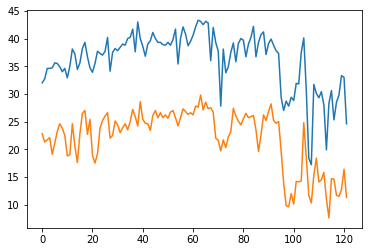

In [16]:
#simplest way to make a plot, with unnamed figure and unnamed axis
plt.plot(maxlist)
plt.plot(minlist);

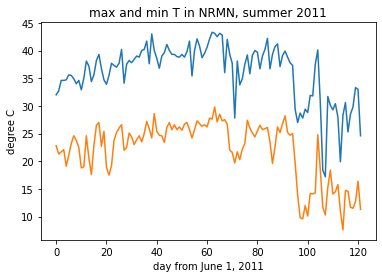

In [17]:
# Normally in this course  we will take the extra step of working with named figure and axis objects
quick, simple = plt.subplots() # default of subplots is to make one axis (simple) in a figure (quick)
simple.plot(maxlist)
simple.plot(minlist)
simple.set_xlabel('day from June 1, 2011')
simple.set_ylabel('degree C')
simple.set_title('max and min T in NRMN, summer 2011')
quick.savefig('max_min_trace.png',dpi=144);

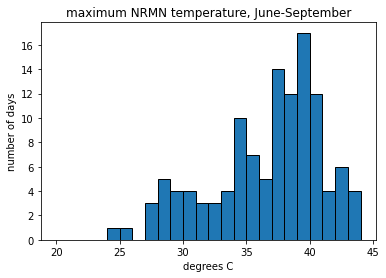

In [18]:
quick2, simple2 = plt.subplots()
simple2.hist(maxlist,bins=list(range(20,45,1)),edgecolor='black') # histogram of max tair
simple2.set_title('maximum NRMN temperature, June-September')
simple2.set_ylabel('number of days')
simple2.set_xlabel('degrees C')
quick2.savefig('maxhist.png');

## Adding two lists

Here are [a few ways to add two lists of numbers](http://stackoverflow.com/questions/18713321/element-wise-addition-of-2-lists-in-python).  Later in this course, we learn how to do it with *numpy arrays*.  But for educational purposes we restrict our program to elementary Python concepts and data types, and also learn something about functions.

In [19]:
play1 = [1,3,6]
play2 = [8,3,4]
play1 + play2 # NOT the way to add the items

[1, 3, 6, 8, 3, 4]

In [20]:
def add_lists(list1, list2):
    assert len(list1) == len(list2)
    sumlist=[]
    for i in range( len(list1) ):
        thesum = list1[i] + list2[i]
        sumlist.append(thesum)
    return sumlist
        

In [21]:
add_lists(play1,play2)

[9, 6, 10]

In [22]:
# repairs a list of temperatures that contain a missing value, by reusing the previous value
def fill_missing(alist):
    repaired=[]
    for item in alist:
        if item>-990:
            repaired.append(item)
        else:
            repaired.append(repaired[-1])
    return repaired

In [23]:
miss = [1,-991,3,4]
fill_missing(miss)

[1, 1, 3, 4]

In [24]:
#list of temperatures on a particular date, in time order
def day_list(tdict,date):
    thelist=[]
    for k in sorted(tdict):
        if k[0:8] == date: 
            thelist.append( tdict[k] )
    return thelist

In [25]:
dates = ['20110802','20110804'] 

In [26]:
for date in dates: # below, note missing value for 201108084
    print( '\n',date,day_list(tairs,date) )


 20110802 [32.2, 32.1, 31.9, 31.9, 32.0, 31.7, 31.6, 31.5, 31.6, 31.4, 31.4, 31.4, 31.1, 30.9, 31.0, 30.6, 30.7, 30.5, 30.4, 30.5, 30.5, 30.5, 30.4, 30.5, 30.4, 30.4, 30.4, 30.3, 30.0, 30.0, 29.9, 29.8, 30.0, 29.8, 29.7, 29.6, 29.7, 29.6, 29.6, 29.7, 29.8, 30.0, 29.7, 29.7, 29.7, 29.4, 29.4, 29.2, 29.1, 29.1, 29.0, 28.9, 29.0, 29.1, 29.0, 29.4, 28.5, 27.6, 28.5, 28.8, 28.5, 28.3, 28.6, 28.5, 28.3, 28.4, 28.2, 28.0, 27.9, 28.1, 28.2, 28.3, 28.4, 28.0, 28.2, 28.1, 28.1, 28.0, 28.0, 28.0, 27.9, 28.0, 28.2, 28.2, 28.1, 28.2, 28.1, 28.1, 28.3, 28.5, 28.7, 28.9, 29.2, 29.4, 29.8, 30.1, 30.4, 30.7, 31.0, 31.1, 31.4, 31.6, 31.7, 32.1, 32.2, 32.5, 32.8, 33.0, 33.5, 33.6, 33.8, 34.2, 34.4, 34.6, 34.8, 35.3, 35.5, 35.8, 36.2, 36.4, 36.7, 37.2, 37.6, 37.6, 37.9, 38.3, 38.8, 38.5, 38.9, 39.0, 39.3, 39.2, 39.5, 39.9, 39.9, 40.0, 40.0, 39.8, 40.1, 40.3, 40.3, 40.5, 41.1, 41.0, 41.0, 40.9, 41.1, 40.7, 40.6, 40.9, 40.6, 41.1, 41.6, 41.9, 41.1, 41.2, 41.3, 41.1, 41.7, 41.1, 41.5, 41.8, 41.9, 41.5, 41.8

A [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) is used below. A very handy feature of Python.  Learn it and use it.

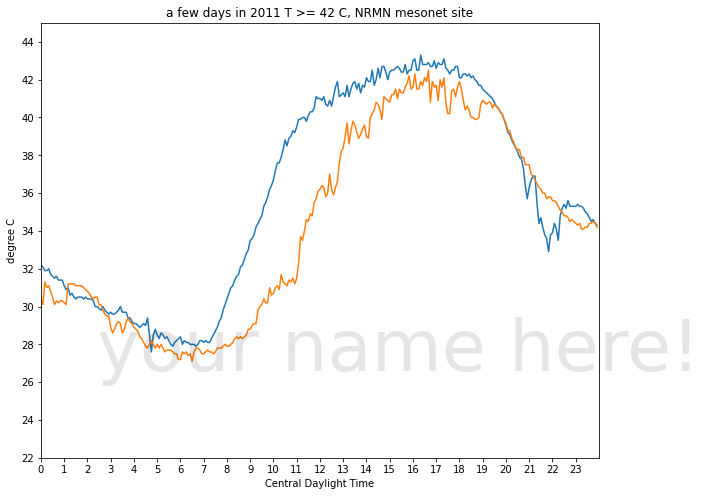

In [27]:
quick, simple = plt.subplots(figsize=(10,8))
for date in dates:
    dayrec = day_list(tairs,date)
    dayrec = fill_missing(dayrec)
    hourtimes = [5.*x/60 for x in range(len(dayrec))] # 
    simple.plot(hourtimes,dayrec)
simple.set_title("some hot days")
simple.set_xlim([0,24]) # 0 to 24 hours
simple.set_ylim([22,45]) # 22 to 45 Celsius
simple.set_xticks(range(0,24,1)) # x tick marks every 1
simple.set_yticks(range(22,45,2)) # y tick marks every 1
simple.set_ylabel('degree C') 
simple.set_xlabel('Central Daylight Time')
simple.set_title('a few days in 2011 T >= 42 C, NRMN mesonet site')
simple.text(.1,.2,'your name here!',fontsize=72, alpha=.1, transform = simple.transAxes)
quick.savefig('meteogramx.png',dpi=144) 

<hr style="height:6px;border:none;background-color:#f00;" />

## Student Tasks

### 1. Composite meteogram

Modify the above meteogram to be for the ten hottest days.  Also include the composite (or average) trace of temperature as a function of hour.  Post your completed PNG at your password-protected website. 

Replace `dates` with a list of the ten hottest days `['20110802', '20110803', '20110805' ...]`. But try to do something
more clever than just typing in the desired strings into `dates`.  Use a [slice](http://pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/slice) of `maxkeys`

Other hints:
 
 * Be sure you understand: `thislist = thatlist.copy()` is different from `thislist = thatlist`
 * You may need to repeatedly use `add_lists`.
 * You will need to make a variable that counts how many lists have been added.
 * You may want to use list comprehension for the final step in computing the average from the sum.
 * After you compute `avg`, you may need: `simple.plot(hourtimes, avg, linewidth=3, color='gray')`

Aim for this:

<!-- <img src="http://metr4330.net/img/meteogram.png" width=500> -->

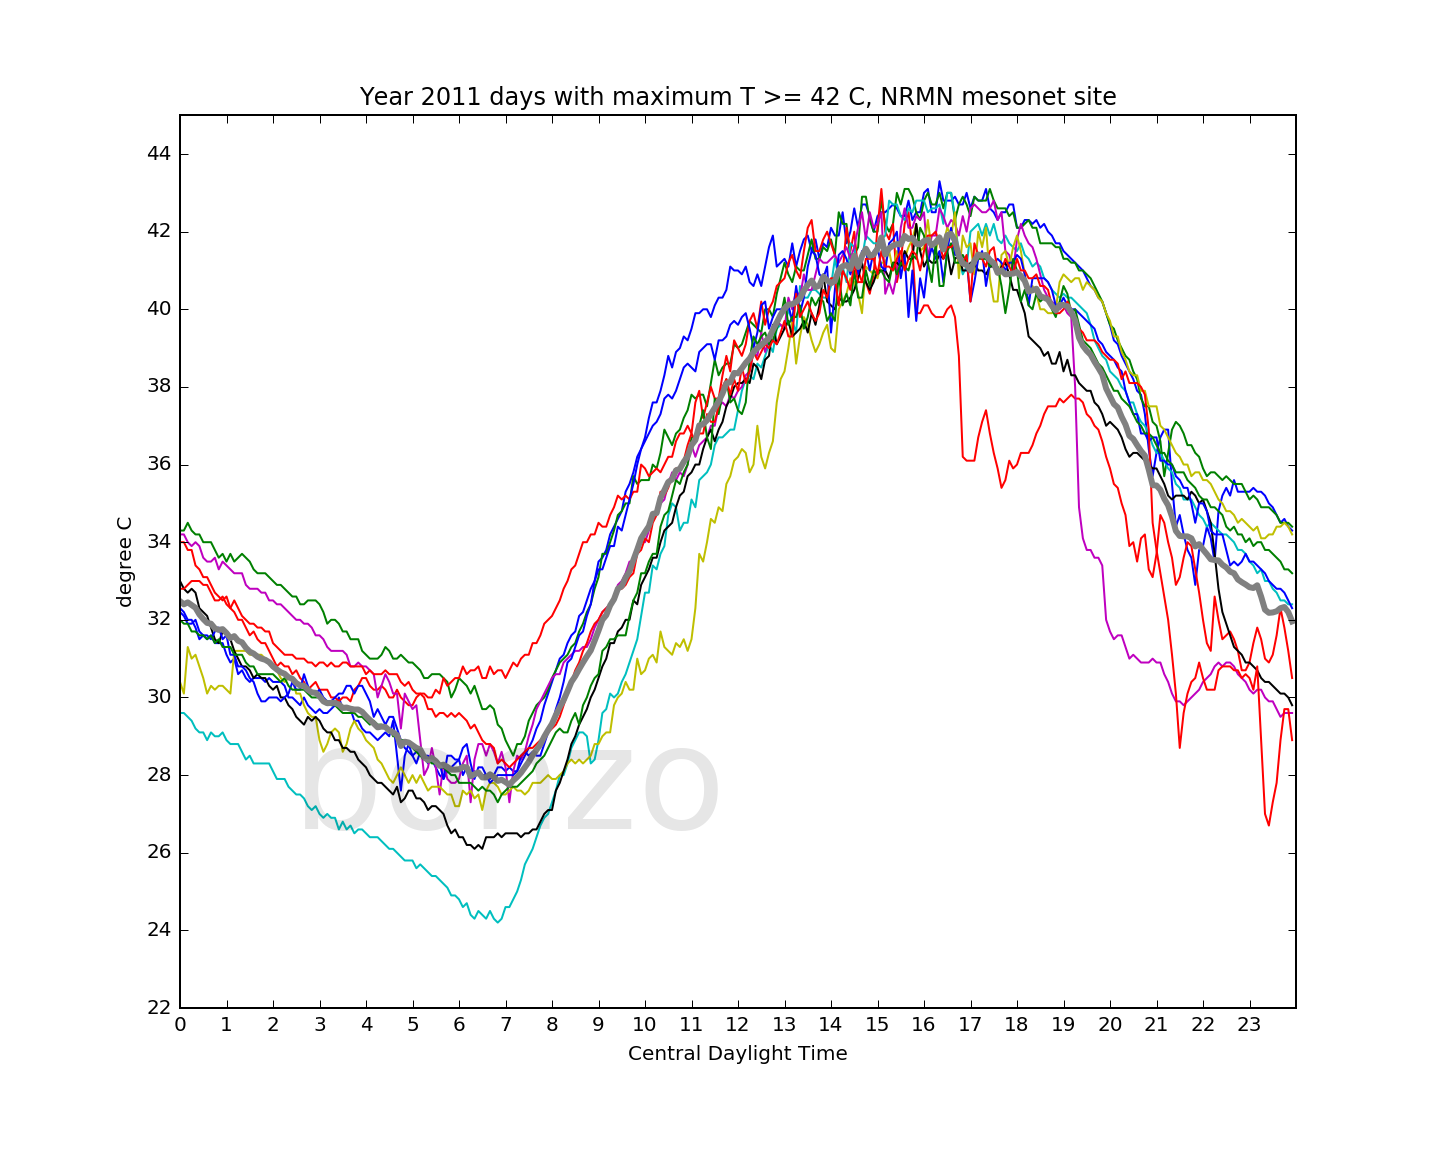

### 2. Daily temperature range

Alter the histogram to give the daily temperature range.  Post your completed PNG at your password-protected website.

Aim for this:
<!-- <img src="http://metr4330.net/img/rangehist.png"> -->

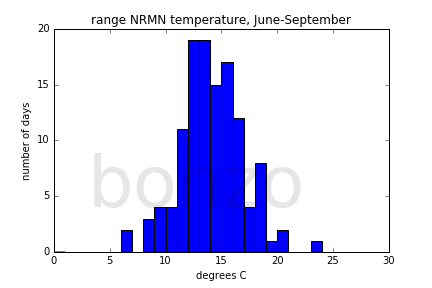

Hint:
 * You may need to make a function `minus_lists`


<hr style="height:6px;border:none;background-color:#00f;" />

## You can open cells below to help answer the questions in Quiz #2. 
By the way, click on the very left of cell to highlight a cell so the boundary is blue 
(so-called "command mode"), and then type "b" to open a new cell below.

I will give away the first few answers.  :)

In [28]:
len(tairs)

35136

In [29]:
type(tairs)

dict

In [30]:
thekeys = sorted( tairs.keys() )
type(thekeys)

list

In [31]:
n = 19999
xkey=thekeys[n]
xkey

'201108091035'

In [32]:
tairs['201108091035']

29.4

In [33]:
xkey[4:6]

'08'

In [34]:
q = [1,2] + [10,11]
q

[1, 2, 10, 11]

In [35]:
r = [x**2 for x in q]
r

[1, 4, 100, 121]

In [36]:
r[-1]

121

In [37]:
#read input in celsius 
temp_cel = int(input('Enter temperature in Celsius: '))
# convert to fahrenheit using formula
temp_ft = (temp_cel * 1.8) +32
# display result
print('Temperature in Fahrenheit is %0.1i'%temp_ft)


Enter temperature in Celsius: 43
Temperature in Fahrenheit is 109


In [38]:
maxkeys[0:10]

['20110802',
 '20110803',
 '20110805',
 '20110709',
 '20110806',
 '20110804',
 '20110824',
 '20110727',
 '20110801',
 '20110808']

In [39]:
print('\nThe 10 hottest days:\n')
for k in maxkeys[0:10]:
    print( k, maxt[k], mval[k])


The 10 hottest days:

20110802 43.3 0
20110803 43.1 0
20110805 43.1 0
20110709 43.0 0
20110806 42.8 0
20110804 42.5 1
20110824 42.2 0
20110727 42.1 0
20110801 42.1 0
20110808 42.0 0


In [40]:
print(len(maxkeys[0:10]))

10


In [41]:
dates = maxkeys[0:10]  
print (dates)

['20110802', '20110803', '20110805', '20110709', '20110806', '20110804', '20110824', '20110727', '20110801', '20110808']


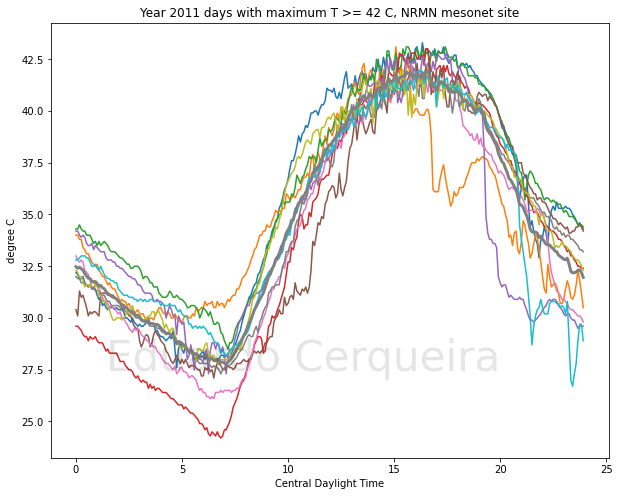

In [51]:
quick, simple = plt.subplots(figsize=(10,8))
n=0
for date in dates:
    dayrec = day_list(tairs,date)
    dayrec = fill_missing(dayrec)
    hourtimes = [5.*x/60 for x in range(len(dayrec))] # 
    simple.plot(hourtimes,dayrec)
    if n==0:
        total = dayrec.copy()
    else:
        total = add_lists(total,dayrec)
    n += 1
avg = [x/n for x in total]
simple.text(.1,.2,'Eduardo Cerqueira',fontsize=42, alpha=.1, transform = simple.transAxes)
simple.plot(hourtimes, avg, linewidth=3, color='gray')
simple.set_ylabel('degree C') 
simple.set_xlabel('Central Daylight Time')
simple.set_title('Year 2011 days with maximum T >= 42 C, NRMN mesonet site')
quick.savefig('meteogramx.png',dpi=144)


In [43]:
daykeys = sorted(maxt) # sorted alphanumerically, earlier date to later date
maxlist=[maxt[x] for x in daykeys] # make a list of high tair for plotting
minlist=[mint[x] for x in daykeys] # make a list of lo tair for plotting

In [44]:
for date in dates: # below, note missing value for 201108084
    print( '\n',date,day_list(tairs,date) )


 20110802 [32.2, 32.1, 31.9, 31.9, 32.0, 31.7, 31.6, 31.5, 31.6, 31.4, 31.4, 31.4, 31.1, 30.9, 31.0, 30.6, 30.7, 30.5, 30.4, 30.5, 30.5, 30.5, 30.4, 30.5, 30.4, 30.4, 30.4, 30.3, 30.0, 30.0, 29.9, 29.8, 30.0, 29.8, 29.7, 29.6, 29.7, 29.6, 29.6, 29.7, 29.8, 30.0, 29.7, 29.7, 29.7, 29.4, 29.4, 29.2, 29.1, 29.1, 29.0, 28.9, 29.0, 29.1, 29.0, 29.4, 28.5, 27.6, 28.5, 28.8, 28.5, 28.3, 28.6, 28.5, 28.3, 28.4, 28.2, 28.0, 27.9, 28.1, 28.2, 28.3, 28.4, 28.0, 28.2, 28.1, 28.1, 28.0, 28.0, 28.0, 27.9, 28.0, 28.2, 28.2, 28.1, 28.2, 28.1, 28.1, 28.3, 28.5, 28.7, 28.9, 29.2, 29.4, 29.8, 30.1, 30.4, 30.7, 31.0, 31.1, 31.4, 31.6, 31.7, 32.1, 32.2, 32.5, 32.8, 33.0, 33.5, 33.6, 33.8, 34.2, 34.4, 34.6, 34.8, 35.3, 35.5, 35.8, 36.2, 36.4, 36.7, 37.2, 37.6, 37.6, 37.9, 38.3, 38.8, 38.5, 38.9, 39.0, 39.3, 39.2, 39.5, 39.9, 39.9, 40.0, 40.0, 39.8, 40.1, 40.3, 40.3, 40.5, 41.1, 41.0, 41.0, 40.9, 41.1, 40.7, 40.6, 40.9, 40.6, 41.1, 41.6, 41.9, 41.1, 41.2, 41.3, 41.1, 41.7, 41.1, 41.5, 41.8, 41.9, 41.5, 41.8

In [45]:
def minus_lists(list1, list2):
    assert len(list1) == len(list2)
    difflist=[]
    for i in range( len(list1) ):
        diff = list1[i] - list2[i]
        difflist.append(diff)
    return difflist

In [46]:
dailyRange = minus_lists(maxlist,minlist)
dailyRange

[9.2,
 11.400000000000002,
 12.900000000000002,
 12.5,
 15.600000000000001,
 14.5,
 12.3,
 10.299999999999997,
 10.2,
 12.100000000000001,
 14.099999999999998,
 16.0,
 13.5,
 16.6,
 16.799999999999997,
 12.8,
 11.700000000000003,
 12.299999999999997,
 14.000000000000004,
 9.300000000000004,
 15.0,
 18.0,
 18.500000000000004,
 13.499999999999996,
 11.8,
 11.700000000000003,
 13.600000000000001,
 12.100000000000001,
 15.0,
 13.100000000000001,
 13.399999999999999,
 15.399999999999999,
 15.100000000000001,
 14.199999999999996,
 16.5,
 15.200000000000003,
 14.500000000000004,
 11.700000000000003,
 18.8,
 11.399999999999999,
 13.200000000000003,
 12.099999999999998,
 14.399999999999999,
 16.200000000000003,
 15.0,
 13.0,
 13.599999999999998,
 12.699999999999996,
 13.2,
 12.599999999999998,
 13.699999999999996,
 12.099999999999998,
 12.799999999999997,
 16.000000000000004,
 11.2,
 14.3,
 14.8,
 13.999999999999996,
 12.400000000000002,
 12.899999999999999,
 14.400000000000002,
 14.3,
 15.6999

Text(5e-05, 0.005, 'Eduardo Cerqueira ')

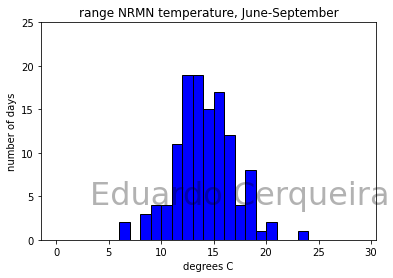

In [47]:
quick2, simple2 = plt.subplots()
simple2.hist(dailyRange,bins=list(range(0,30,1)),edgecolor='black', color = "blue") # histogram of max tair
simple2.set_title('range NRMN temperature, June-September')
simple2.set_ylabel('number of days')
simple2.set_xlabel('degrees C')
simple2.set_ylim(0,20)
simple2.set_yticks((range(0,30,5)))
quick2.savefig('range NRMN.png');
simple2.text(.00005,.005,'Eduardo Cerqueira ',fontsize=32, alpha=.3, transform = simple.transAxes)